# Data Profiling
Data profiling is the process of reviewing source data, understanding structure, content and interrelationships, and identifying potential for data projects. 

import packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

import warnings
warnings.filterwarnings('ignore')

load dataset

In [3]:
df = pd.read_csv('Titanic.csv')

preview dataset

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


info dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


check missing value

In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#Quiz 1
dt = pd.read_csv('data_telco.csv')

In [29]:
dt.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,NaN,NaN,NaN,1,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,NaN,NaN,NaN,NaN,34,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,NaN,NaN,NaN,NaN,2,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,NaN,NaN,NaN,NaN,45,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,NaN,NaN,NaN,NaN,2,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            6034 non-null   object 
 2   SeniorCitizen     6034 non-null   float64
 3   Partner           6034 non-null   object 
 4   Dependents        6034 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     6034 non-null   object 
 8   InternetService   6034 non-null   object 
 9   OnlineSecurity    6034 non-null   object 
 10  OnlineBackup      6034 non-null   object 
 11  DeviceProtection  6034 non-null   object 
 12  TechSupport       6034 non-null   object 
 13  StreamingTV       6034 non-null   object 
 14  StreamingMovies   6034 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
dt.isna().sum()

customerID             0
gender              1009
SeniorCitizen       1009
Partner             1009
Dependents          1009
tenure                 0
PhoneService           0
MultipleLines       1009
InternetService     1009
OnlineSecurity      1009
OnlineBackup        1009
DeviceProtection    1009
TechSupport         1009
StreamingTV         1009
StreamingMovies     1009
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64

In [32]:
dt['Partner'].value_counts()

No     3111
Yes    2923
Name: Partner, dtype: int64

# Data Cleansing
Data cleansing is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.

<AxesSubplot:ylabel='Frequency'>

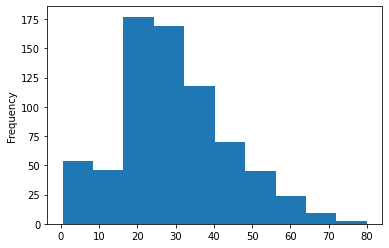

In [13]:
#Column Age
df['Age'].plot(kind='hist')

In [15]:
val = df["Age"].median()
df['Age'] = df['Age'].fillna(val)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
#Column Cabin
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [19]:
#delete cabin column
df.drop('Cabin',axis=1, inplace=True)

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
#Column Embarked
df['Embarked'] = df['Embarked'].fillna('Unknown')

In [22]:
df['Embarked'].value_counts()

S          644
C          168
Q           77
Unknown      2
Name: Embarked, dtype: int64

In [26]:
#Column SibSp and Parch
df['Alone']=df['SibSp']+df['Parch']

In [27]:
df['Alone'][df['Alone']>0]='With Family'
df['Alone'][df['Alone']==0]='Without Family'

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Without Family
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Without Family


In [33]:
#Quiz 2
dt['Partner'] = dt['Partner'].fillna('Unknown')

In [34]:
dt['Partner'].value_counts()

No         3111
Yes        2923
Unknown    1009
Name: Partner, dtype: int64

In [11]:
#change data type
extr = dt['TotalCharges'].str.extract(r'^(\d{4})', expand=False)
dt['TotalCharges'] = pd.to_numeric(extr)

In [12]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            6034 non-null   object 
 2   SeniorCitizen     6034 non-null   float64
 3   Partner           6034 non-null   object 
 4   Dependents        6034 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     6034 non-null   object 
 8   InternetService   6034 non-null   object 
 9   OnlineSecurity    6034 non-null   object 
 10  OnlineBackup      6034 non-null   object 
 11  DeviceProtection  6034 non-null   object 
 12  TechSupport       6034 non-null   object 
 13  StreamingTV       6034 non-null   object 
 14  StreamingMovies   6034 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 
